In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [3]:
#download the weather images and put them in a directory
path = r'C:\Users\ASUS\ClimateWins 07.24\02 Data Set\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [4]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [5]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [6]:
if train_generator is None or test_generator is None:
    print("Generator is not properly initialized.")
else:
    print("Number of images in train_generator:", train_generator.n)
    print("Number of images in test_generator:", test_generator.n)

Number of images in train_generator: 901
Number of images in test_generator: 224


In [7]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 40, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size-1,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size-1,
)

train_generator.n // train_generator.batch_size - 1

Epoch 1/40


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 26s 811ms/step - accuracy: 0.4584 - loss: 0.1487 - val_accuracy: 0.5885 - val_loss: 0.1809
Epoch 2/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5486 - loss: 0.1986 - val_accuracy: 0.6875 - val_loss: 0.1420
Epoch 3/40


C:\Users\ASUS\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 644ms/step - accuracy: 0.7005 - loss: 0.1110 - val_accuracy: 0.7917 - val_loss: 0.0915
Epoch 4/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8125 - loss: 0.0690 - val_accuracy: 0.7500 - val_loss: 0.0934
Epoch 5/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 674ms/step - accuracy: 0.8763 - loss: 0.0553 - val_accuracy: 0.8333 - val_loss: 0.0648
Epoch 6/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7500 - loss: 0.0761 - val_accuracy: 0.8125 - val_loss: 0.0904
Epoch 7/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 620ms/step - accuracy: 0.8529 - loss: 0.0557 - val_accuracy: 0.8125 - val_loss: 0.0788
Epoch 8/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8889 - loss: 0.0514 - val_accuracy: 0.8750 - val_loss: 0.0431
Epoch 9/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 679ms/step - accuracy: 0.8573 - loss: 0.0553 - val_accuracy: 0.6823 - val_loss: 0.1114
Epoch 10/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7951 - loss: 0.0725 - val_accuracy: 0.8125 - val

27

In [8]:
results = pd.DataFrame(model.history.history)

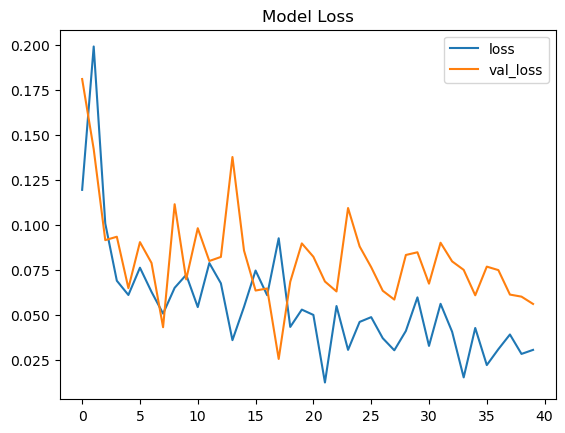

In [9]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

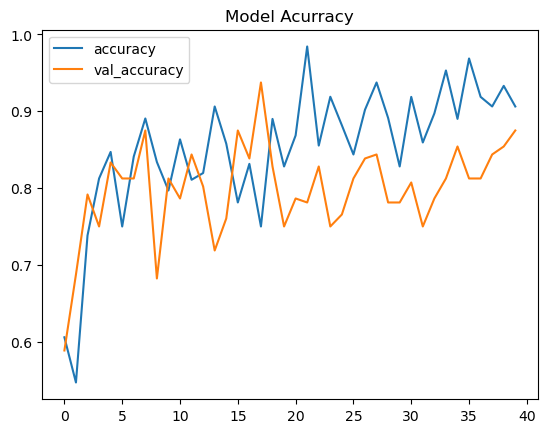

In [10]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [11]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.90625, Val_Accuracy: 0.875
Loss: 0.030559558421373367, Val_Loss: 0.05606120452284813


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step


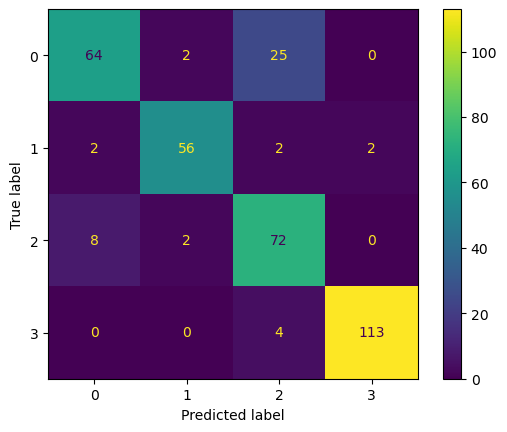

In [12]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [14]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)